In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bucketing(Record_Demographics_dir, Record_Data_Extraction, select, to_be_selected1, to_be_selected2, keyword):
    df = pd.read_excel(Record_Demographics_dir, header=[0,1])
    df1 = pd.read_excel(Record_Demographics_dir, header=None)
    df_prime = pd.read_excel(Record_Data_Extraction, header=[0,1])
    df_prime1 = pd.read_excel(Record_Data_Extraction, header=None)
    columns2 = [df_prime.columns[i][1] for i in range(df_prime.shape[1])]
    columns1 = [df.columns[i][1] for i in range(df.shape[1])]
    col_indx = columns2.index(select)
    accepted_rows = np.where(df_prime1[col_indx] == 'Yes')
    keyword_accepted_column = columns1.index(keyword)
    
    
    
    sel_col_indx1 = [columns1.index(to_be) for to_be in to_be_selected1]
    sel_col_indx2 = [columns2.index(to_be) for to_be in to_be_selected2]
    df1 = np.array(df1)
    df_prime1 = np.array(df_prime1)
    
    desired_data1 = df1[list(accepted_rows)[0]]
    desired_data1 = desired_data1[:,sel_col_indx1]
    
    ##
    desired_keyword_data = df1[list(accepted_rows)[0]]
    desired_keyword_data = desired_keyword_data[:,keyword_accepted_column]
    ##
    
    desired_data2 = df_prime1[list(accepted_rows)[0]]
    desired_data2 = desired_data2[:,sel_col_indx2]

    #print(desired_data1, desired_data2)
    return desired_data1, desired_data2, desired_keyword_data

def excel_creator(to_be_selected1, to_be_selected2, a1, a2, name):
    new_data = np.concatenate((a1, a2), axis=1)
    new_selected = np.concatenate((to_be_selected1, to_be_selected2))
    df = pd.DataFrame({new_selected[j]: list(new_data[:,j]) for j in range(new_data.shape[1])})
    
    writer = pd.ExcelWriter("{}.xlsx".format(name), engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object. Note that we turn off
# the default header and skip one row to allow us to insert a user defined
# header.
    df.to_excel(writer, sheet_name='Sheet1', startrow=0, header=True)

# Get the xlsxwriter workbook and worksheet objects.
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

# Add a header format.
    header_format = workbook.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#D7E4BC',
        'border': 1})

# Write the column headers with the defined format.
    for col_num, value in enumerate(df.columns.values):
        worksheet.write(0, col_num + 1, value, header_format)

# Close the Pandas Excel writer and output the Excel file.
    writer.save()


In [3]:
def excel_creator2(to_be_selected1, to_be_selected2, a1, a2, desired_keyword_data, name):
    all_uniques = list(set(desired_keyword_data))
    for keyword_indx in range(len(all_uniques)):
        
        a_new_locations = np.where(desired_keyword_data == all_uniques[keyword_indx])
        a_new_locations = list(a_new_locations)[0]
        a1_new = a1[a_new_locations,:]
        a2_new = a2[a_new_locations,:]
        new_data = np.concatenate((a1_new, a2_new), axis=1)
        new_selected = np.concatenate((to_be_selected1, to_be_selected2))
        df = pd.DataFrame({new_selected[j]: list(new_data[:,j]) for j in range(new_data.shape[1])})

        writer = pd.ExcelWriter("{}_{}.xlsx".format(name, all_uniques[keyword_indx]), engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object. Note that we turn off
    # the default header and skip one row to allow us to insert a user defined
    # header.
        df.to_excel(writer, sheet_name='Sheet1', startrow=0, header=True)

    # Get the xlsxwriter workbook and worksheet objects.
        workbook  = writer.book
        worksheet = writer.sheets['Sheet1']

    # Add a header format.
        header_format = workbook.add_format({
            'bold': True,
            'text_wrap': True,
            'valign': 'top',
            'fg_color': '#D7E4BC',
            'border': 1})

    # Write the column headers with the defined format.
        for col_num, value in enumerate(df.columns.values):
            worksheet.write(0, col_num + 1, value, header_format)

    # Close the Pandas Excel writer and output the Excel file.
        writer.save()


In [4]:
Record_Demographics_dir = "D:\\M.Sheikh\\Book2.xlsx"
Record_Data_Extraction = "D:\\M.Sheikh\\Book1.xlsx"
select = "Privacy Mentioned"
to_be_selected1 = ["Item Number", "Corresponding Author"]
to_be_selected2 = ["Privacy Page ", "Privacy Text"]

a1, a2, c = bucketing(Record_Demographics_dir, Record_Data_Extraction, select, to_be_selected1, to_be_selected2, 'Corresp. Author (Host Faculty)')
len(a1)
len(a2)
excel_creator(to_be_selected1, to_be_selected2, a1, a2, "Mohsen")
excel_creator2(to_be_selected1, to_be_selected2, a1, a2, c, "new_moh")

In [20]:
import docx
def word_convertor(excel_file, save_name):
    df = pd.read_excel(excel_file, header=[0])
    columns1 = [df.columns[i] for i in range(df.shape[1])]
    columns1 = columns1[1:]
    doc = docx.Document()
    df = np.array(df)
    for sample in range(df.shape[0]):
        new_paragraph = ''
        for i, header in enumerate(columns1):
            new_paragraph = new_paragraph + header + ': ' + str(df[sample, i+1]) + "        "
        doc.add_paragraph(new_paragraph)

    doc.save(save_name)

In [21]:
word_convertor("new_moh_Pharmacy.xlsx", 'm_new.docx')

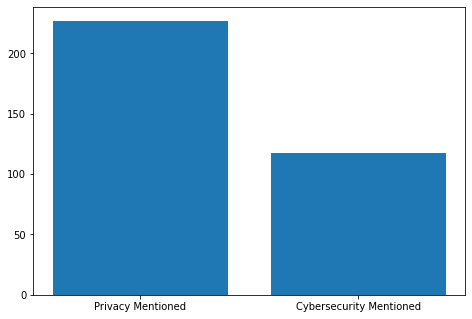

In [22]:
select = "Cybersecurity Mentioned"
group_selection = ["Privacy Mentioned", "Cybersecurity Mentioned"]
df = pd.read_excel("D:\\M.Sheikh\\Book1.xlsx", header=[0,1])
df1 = pd.read_excel("D:\\M.Sheikh\\Book1.xlsx", header=None)
df_prime = pd.read_excel("D:\\M.Sheikh\\Book2.xlsx", header=[0,1])
df_prime1 = pd.read_excel("D:\\M.Sheikh\\Book2.xlsx", header=None)
columns2 = [df_prime.columns[i][1] for i in range(df_prime.shape[1])]
columns1 = [df.columns[i][1] for i in range(df.shape[1])]
col_indx = columns1.index(select)
accepted_rows = np.where(df1[col_indx] == 'Yes')
#keyword_accepted_column = columns1.index(keyword)
n_total_accepted = len(accepted_rows[0])

n_total_accepted = []
for selected in group_selection:
    
    col_indx = columns1.index(selected)
    accepted_rows = np.where(df1[col_indx] == 'Yes')
    n_total_accepted.append(len(accepted_rows[0]))
    
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(group_selection,n_total_accepted)
plt.show()

In [8]:
# If you want to get the bar plots based on disciplines change selected_discipline to None
# group_selection is the disciplines to be shown
# If you define the selected_discipline, you need to define column_name too. column_name is the column that
# we want to find number of repeats in it.
def bucketing(Record_Data_Extraction, Record_Demographics_dir, saved_fig_name, group_selection = None, selected_discipline = None, column_name = None):
    df = pd.read_excel("D:\\M.Sheikh\\Book1.xlsx", header=[0,1])
    df1 = pd.read_excel("D:\\M.Sheikh\\Book1.xlsx", header=None)
    df_prime = pd.read_excel("D:\\M.Sheikh\\Book2.xlsx", header=[0,1])
    df_prime1 = pd.read_excel("D:\\M.Sheikh\\Book2.xlsx", header=None)
    columns2 = [df_prime.columns[i][1] for i in range(df_prime.shape[1])]
    columns1 = [df.columns[i][1] for i in range(df.shape[1])]
    df_prime1 = df_prime1[:][2:]
    
    if not selected_discipline:
        n_total_accepted = []
        for selected in group_selection:

            col_indx = columns1.index(selected)
            accepted_rows = np.where(df1[col_indx] == 'Yes')
            n_total_accepted.append(len(accepted_rows[0]))
            
        names = group_selection
        values = n_total_accepted
    
    if selected_discipline:
        
        col_indx = columns1.index(selected_discipline)
        accepted_rows = np.where(df1[col_indx] == 'Yes')
        
        selected_col = columns2.index(column_name)
        df_prime1_new = df_prime1[selected_col][accepted_rows[0]]
        all_uniques = list(set(df_prime1_new))
        
        n_total_accepted = []
        for selected in all_uniques:
            new_accepted_rows = np.where(df_prime1_new == selected)
        
            n_total_accepted.append(len(new_accepted_rows[0]))
        
        names = all_uniques
        values = n_total_accepted
    
    %matplotlib inline
    fig = plt.figure(figsize=(17, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.barh(names, values)
    plt.savefig(saved_fig_name, bbox_inches='tight')
    plt.show()
    
    final_dict = {}
    for idx, name in enumerate(names):
        final_dict[name] = values[idx] 
    return final_dict

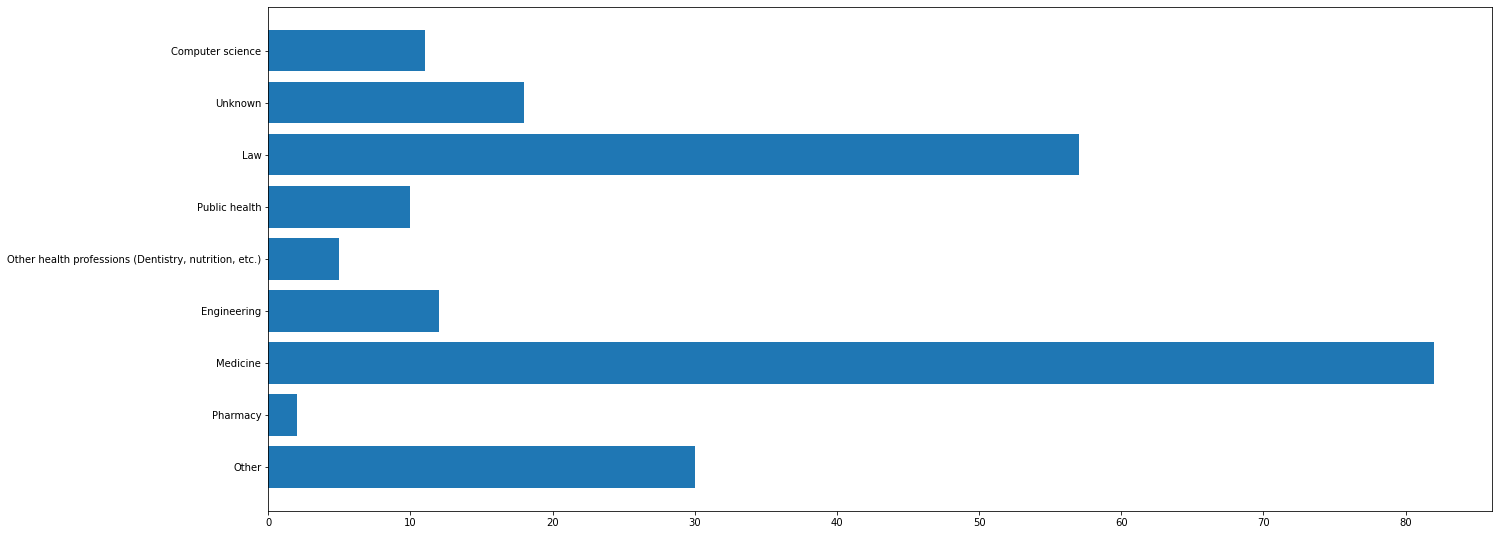

In [9]:
Record_Demographics_dir = "D:\\M.Sheikh\\Book2.xlsx"
Record_Data_Extraction = "D:\\M.Sheikh\\Book1.xlsx"
saved_fig_name = "x.jpg"
group_selection = None
selected_discipline = "Privacy Mentioned"
column_name = "Corresp. Author (Host Faculty)"
a = bucketing(Record_Data_Extraction, Record_Demographics_dir, saved_fig_name, group_selection = None, selected_discipline = selected_discipline, column_name = column_name)